In [ ]:
# install all libraries (JUPYTER ONLY)

import sys
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install pyLDAvis
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install tqdm

In [1]:
import re
import numpy as np
import pandas as  pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import data_preprocessing
from data_preprocessing import *
%matplotlib inline

In [2]:
# Import Dataset
train_df,test_df,val_df=get_data_from_tsv('/home/siva/Desktop/ml/liar_dataset/train.tsv','/home/siva/Desktop/ml/liar_dataset/test.tsv','/home/siva/Desktop/ml/liar_dataset/valid.tsv')

df = pd.concat([train_df, test_df, val_df])

r_df = df[df["Party"] == "republican"]
d_df = df[df["Party"] == "democrat"]

l_df = df[(df["Label"] == "false") | (df["Label"] == "barely-true") | (df["Label"] == "pants-fire") | (df["Label"] == "half-true")]
t_df = df[(df["Label"] == "true") | (df["Label"] == "mostly-true")]


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Convert to list 
data = df.Content.values.tolist()
# Remove new line characters, quotes and punctuation
data = [re.sub('\s+', ' ', line) for line in data]  
data = [re.sub("\'", "", line) for line in data]
data = [re.sub('\W+',' ', line) for line in data]

# Concatonate text to entire corpus
data_textOnly = " ".join(data)


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \W
<>:4: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \W
<>:4: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \W
<ipython-input-3-6bd9957d0e49>:4: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', line) for line in data]
<ipython-input-3-6bd9957d0e49>:6: DeprecationWarning: invalid escape sequence \W
  data = [re.sub('\W+',' ', line) for line in data]


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


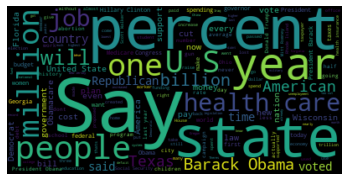

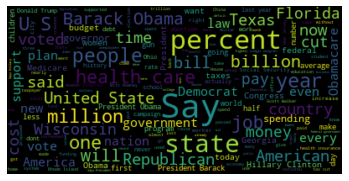

In [4]:
get_world_cloud(data_textOnly)

In [5]:
# Tokenize all the words and clean up the text
words = list(sent_to_words(data))

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(words, min_count=5, threshold=100)
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram = gensim.models.Phrases(bigram[words], threshold=100)
trigram_model = gensim.models.phrases.Phraser(trigram)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#download spacy models
!{sys.executable} -m spacy download en

/bin/bash: {sys.executable}: command not found


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Remove Stop Words
# NLTK Stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['republican', 'government', 'democrat', 'say'])
data_words_nostops = remove_stopwords(words,stop_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops,bigram_model)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, nlp, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['say', 'list', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand']]


In [9]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in data_lemmatized]  
# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Initialize the LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta=0.61,
                                           per_word_topics=True)


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Print the keyword of topics
print(lda_model.print_topics())


[(0, '0.072*"say" + 0.041*"year" + 0.032*"state" + 0.024*"job" + 0.021*"go" + 0.020*"vote" + 0.017*"time" + 0.013*"make" + 0.012*"last" + 0.011*"take"'), (1, '0.078*"percent" + 0.033*"people" + 0.021*"high" + 0.019*"rate" + 0.014*"insurance" + 0.013*"country" + 0.012*"school" + 0.012*"low" + 0.011*"health" + 0.011*"american"'), (2, '0.052*"say" + 0.047*"tax" + 0.036*"spend" + 0.031*"support" + 0.029*"plan" + 0.026*"cut" + 0.023*"want" + 0.023*"taxis" + 0.018*"program" + 0.015*"never"'), (3, '0.035*"law" + 0.034*"increase" + 0.024*"child" + 0.024*"say" + 0.021*"dollar" + 0.016*"woman" + 0.015*"propose" + 0.014*"abortion" + 0.013*"call" + 0.012*"deal"'), (4, '0.059*"pay" + 0.027*"half" + 0.023*"education" + 0.020*"gun" + 0.010*"receive" + 0.010*"bad" + 0.009*"border" + 0.008*"sell" + 0.008*"investment" + 0.007*"admit"'), (5, '0.050*"federal" + 0.035*"cost" + 0.026*"average" + 0.020*"spending" + 0.020*"allow" + 0.015*"democratic" + 0.015*"big" + 0.014*"service" + 0.014*"many" + 0.014*"sec

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.029907977763182

Coherence Score:  0.3954107882853896


In [13]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import numpy as np
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

for k in topics_range:
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k, a=a, b=b)
            # Save the model results
            model_results['Validation_Set'].append('100% Corpus')
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)
                    
pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
